# Animate Simulation

This notebook is used to animate the simulation.

In [174]:
from simulation import NetworkSimulation

from environment import Environment
from location import Location

from importlib import reload
from matplotlib import animation, rc
from IPython.display import HTML

In [175]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [176]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
from msci.utils.plot import plot_histogram_jn

## Setup the environment

The environement is an object which contains an area. The area is a list of lists.

## Probability distributions

In [283]:
from msci.utils import utils
mac_address_df = utils.import_mac_addresses(version=1)

In [298]:
from scipy import stats

In [300]:
values = (mac_address_df[mac_address_df.shopper_label == 1].length_of_stay / 60).as_matrix()

In [330]:
shopper_leaving = stats.kde.gaussian_kde(values)

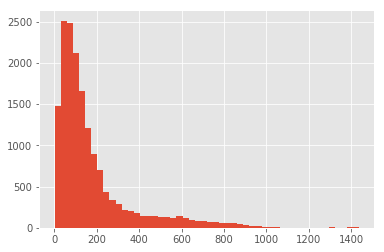

In [331]:
(mac_address_df[mac_address_df.shopper_label == 1].length_of_stay / 60).hist(bins=50)

In [314]:
from scipy.stats import cumfreq
from scipy.integrate import quad

In [374]:
shopper_leaving = norm(loc=100, scale=30)

In [375]:
shopper_leaving.cdf(150)

0.9522096477271853

In [376]:
x = np.arange(200)

In [377]:
y = shopper_leaving.cdf(x)

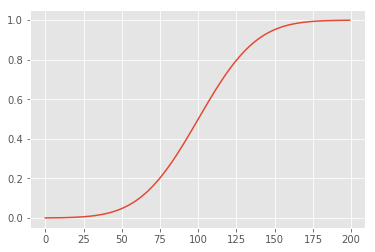

In [379]:
plt.plot(x, y)

## Create environment

In [380]:
locations = [Location('s{}'.format(i)) for i in range(150)]

In [381]:
environment = Environment(locations)

## Run the simulation

The simulation requires the maximum number of iterations (time) and the maximum number of shoppers (agents).

In [382]:
sim = NetworkSimulation(environment, max_shoppers=10000)
sim.shopper_leave_distribution = shopper_leaving
sim.iterate(max_iterations=1000)
sim.create_signal_df()
sim.create_mac_address_df()

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

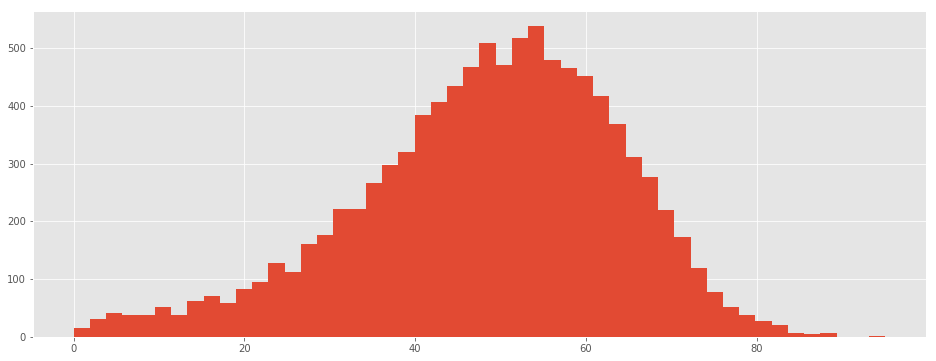

In [383]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sim.mac_address_df.length_of_stay.hist(bins=50, ax=ax)

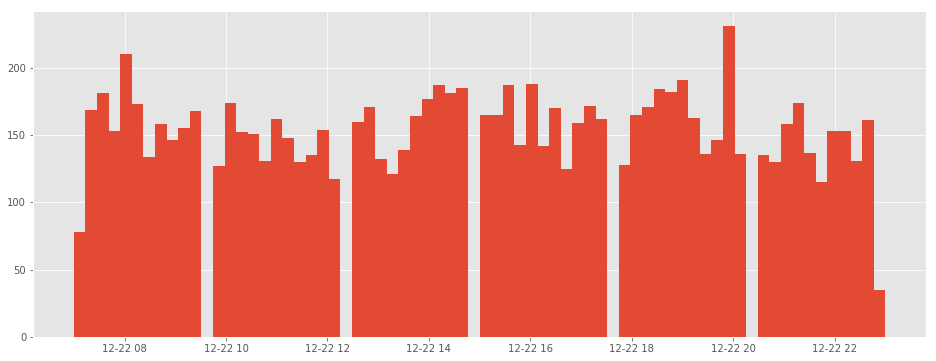

In [249]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
pd.to_datetime(sim.mac_address_df.start_time).dt.round('15min').hist(bins=70, ax=ax)

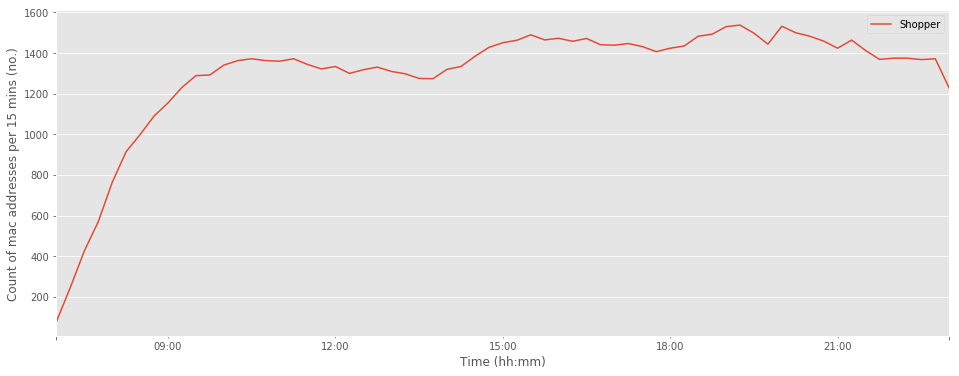

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

plot_histogram_jn(
    sim.signal_df, 
    axes=ax,
    label='Shopper',
);

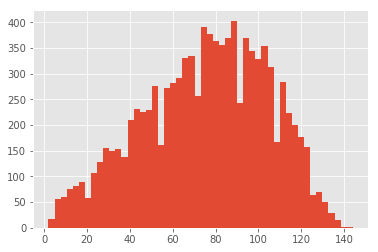

In [252]:
sim.mac_address_df.number_of_shops.hist(bins=50)

In [256]:
sim.mac_address_df

,mac_address,number_of_shops,length_of_stay,start_time
0,1,76,94.08,2016-12-22 07:00:00.000
1,2,87,122.88,2016-12-22 07:00:00.000
2,3,128,227.52,2016-12-22 07:00:00.000
3,4,39,45.12,2016-12-22 07:00:00.000
4,5,84,107.52,2016-12-22 07:00:00.000
5,6,98,162.24,2016-12-22 07:00:00.000
6,7,50,57.60,2016-12-22 07:00:00.000
7,8,64,78.72,2016-12-22 07:00:00.000
8,9,71,77.76,2016-12-22 07:00:00.000
9,10,113,191.04,2016-12-22 07:00:00.000
